<a href="https://colab.research.google.com/github/Sar9844/AWS-opera-o-farmac-utica-/blob/main/analisededadosEDN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa o pandas, biblioteca padrão do Python para análise de dados em formato de tabela (DataFrames).

In [1]:
import pandas as pd

 Lê a planilha Página1 do arquivo Excel e ignora a primeira linha que tem títulos soltos. Os dados úteis começam na segunda linha.

In [2]:
# Leitura dos dados
df = pd.read_excel("analisededados.xlsx", sheet_name="Página1", skiprows=1)

 Dá nomes simples e limpos para as colunas:

Idade: Idade do cliente

Produto: Produto comprado

Horario: Hora da compra

In [3]:
df.columns = ["Idade", "Produto", "Horario"]

 Converte a coluna "Horario" de string (texto) para o tipo hora, usando o formato padrão de hora (HH:MM:SS).

 Isso permite trabalhar com horas em cálculos e classificações.

In [4]:
# Converter o horário para datetime
df["Horario"] = pd.to_datetime(df["Horario"], format="%H:%M:%S").dt.time

In [5]:
df

,Idade,Produto,Horario
0,19,Smartwatch,18:00:00
1,35,Smartwatch,20:45:00
2,27,Smartwatch,04:00:00
3,42,Smartphone,15:15:00
4,41,Teclado Mecânico,21:00:00
...,...,...,...
999,27,Teclado Mecânico,03:45:00
1000,41,Smartwatch,23:45:00
1001,27,Teclado Mecânico,20:15:00
1002,46,Teclado Mecânico,16:30:00


 A função classificar_periodo pega a hora de uma compra e classifica em:

Madrugada: 00h–06h

Manhã: 06h–12h

Tarde: 12h–18h

Noite: 18h–24h


In [6]:
# Criar períodos do dia
def classificar_periodo(horario):
    h = horario.hour
    if 6 <= h < 12:
        return "Manhã"
    elif 12 <= h < 18:
        return "Tarde"
    elif 18 <= h < 24:
        return "Noite"
    else:
        return "Madrugada"

O .apply() aplica essa função em cada linha da coluna Horario.

In [7]:
df["Periodo"] = df["Horario"].apply(lambda x: classificar_periodo(pd.to_datetime(str(x))))

Mostra um resumo com o número total de compras em cada período do dia.

 É útil para ver qual faixa horária tem mais atividade.

In [8]:
# Exemplo: Quantas compras por período
df["Periodo"].value_counts()

,count
Periodo,
Tarde,321
Noite,301
Madrugada,242
Manhã,140


Agrupa os clientes em faixas etárias:

até 20 anos

21 a 30

31 a 40

41 a 50

acima de 50

Essa informação é importante para entender o comportamento por idade.

<ipython-input-9-c504ee020558>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Faixa_Etaria", "Produto"]).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='Faixa_Etaria'>

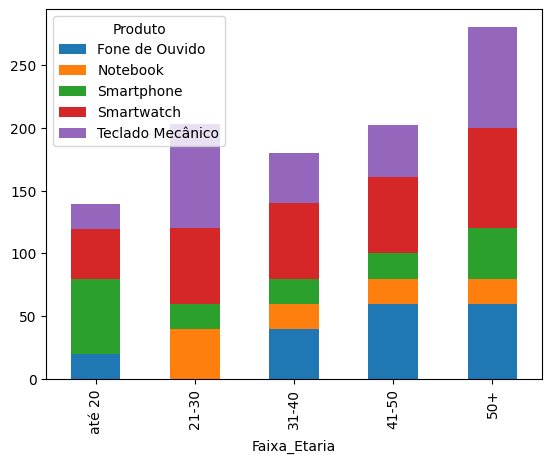

In [9]:
# Exemplo: Produto mais comprado por faixa etária
df["Faixa_Etaria"] = pd.cut(df["Idade"], bins=[0, 20, 30, 40, 50, 100], labels=["até 20", "21-30", "31-40", "41-50", "50+"])
df.groupby(["Faixa_Etaria", "Produto"]).size().unstack().plot(kind='bar', stacked=True)

Aqui, estamos:

Agrupando os dados por faixa etária e produto;

Contando quantos clientes de cada faixa compraram cada produto;

Criando um gráfico de barras empilhadas, mostrando a distribuição por idade.

#GRÁFICOS POR HORÁRIOS

A distribuição de compras por faixas de horário do dia.

Ajuda a descobrir horários de pico de compra, o que pode influenciar campanhas de marketing, ofertas e otimização de infraestrutura.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Essas duas bibliotecas são fundamentais para análise de dados e visualização:

matplotlib.pyplot: para criar gráficos.

seaborn: uma camada mais bonita e fácil sobre matplotlib, ideal para gráficos estatísticos.

<ipython-input-11-2a98f3670782>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Periodo", order=ordem_periodos, palette="viridis")


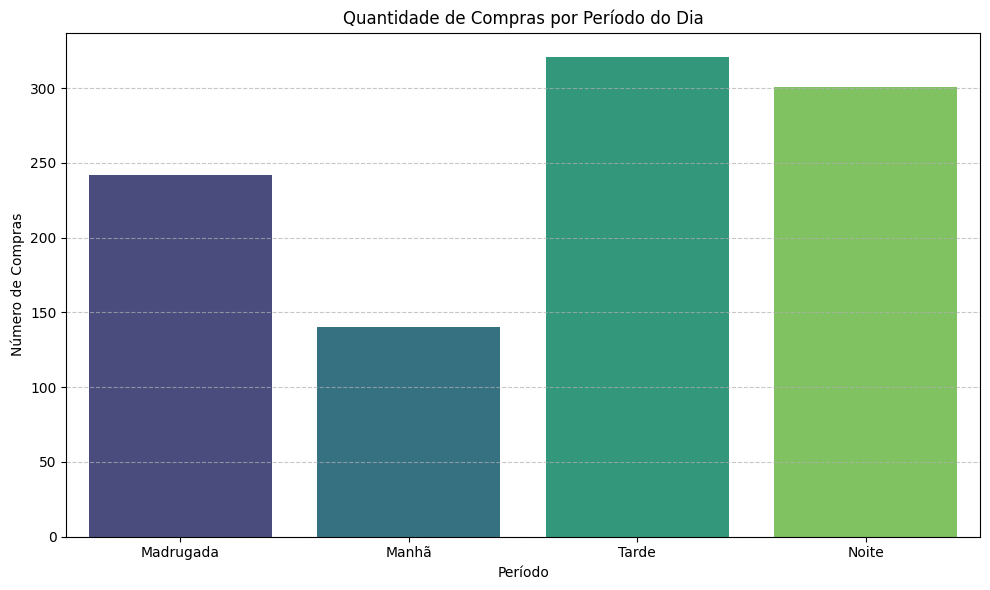

In [11]:
ordem_periodos = ["Madrugada", "Manhã", "Tarde", "Noite"]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Periodo", order=ordem_periodos, palette="viridis")
plt.title("Quantidade de Compras por Período do Dia")
plt.xlabel("Período")
plt.ylabel("Número de Compras")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6)): define o tamanho do gráfico.

sns.countplot(...): cria um gráfico de barras que conta quantas vezes cada valor aparece na coluna Periodo.

order=ordem_periodos: garante que os períodos apareçam na ordem certa (Madrugada → Noite).

palette="viridis": define as cores das barras (estética).

tight_layout() ajusta tudo para caber bem.

plt.show() exibe o gráfico.

# RESPONDA:



1. Em que horário as pessoas mais compram?

2. Qual produto é mais popular entre jovens? E entre os mais velhos?

3. Como o comportamento varia conforme a hora do dia?

# AGRADEÇO A PARTICIPAÇÃO DE TODOS!